## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://github.com/astec-stfc/masterlattice/) and [SimCodes](https://github.com/astec-stfc/simcodes/) repositories have been cloned, and that they are accessible at the same directory level as SimFrame. Alternatively, these can be installed via `setup.py` in their respective directories, in which case they do not have to be provided on instantiation.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../../../../")
import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        master_lattice='../../../../../masterlattice/MasterLattice/',
        simcodes='../../../../../simcodes/SimCodes',
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

initializing ocelot...


Invalid MIT-MAGIC-COOKIE-1 key

### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [2]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [3]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [4]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [5]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [6]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [7]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [8]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090) 

Generate and track the bunch 

In [9]:
framework.track(startfile=startline, endfile=endline)

The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [3]:
fwdir = load_directory("./getting_started", beams=True, verbose=True)

Found MasterLattice Package = /home/xkc85723/Documents/masterlattice/MasterLattice/./
Found SimCodes Package = /home/xkc85723/Documents/simcodes/SimCodes/./
Directory: /home/xkc85723/Documents/simframe/docs/source/examples/notebooks/getting_started
elegant ['S05.twi', 'S04.twi', 'L4H.twi', 'L02.twi', 'VBC.twi', 'L03.twi', 'S06.twi', 'S03.twi', 'S02.twi']
elegant
name='z' unit='m' val=array([ 0.        ,  0.        ,  0.        ,  0.231068  ,  0.393068  ,
        0.439768  ,  0.489768  ,  0.6037    ,  0.6537    ,  0.692938  ,
        0.703438  ,  0.703438  ,  0.713938  ,  0.7572    ,  0.7572    ,
        0.804928  ,  0.884928  ,  0.981068  ,  1.143068  ,  1.193068  ,
        1.298068  ,  1.298068  ,  1.403068  ,  1.4031    ,  1.4031    ,
        1.4031    ,  1.4031    ,  1.4031    ,  1.4031    ,  1.531668  ,
        1.581668  ,  1.621168  ,  1.783168  ,  1.833668  ,  1.883668  ,
        1.988668  ,  1.988668  ,  2.093668  ,  2.141168  ,  2.303168  ,
        2.516463  ,  2.516463  ,  2.6

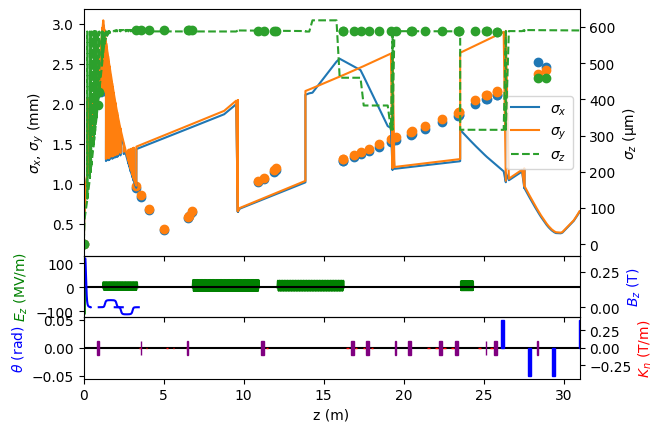

In [4]:
plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])

In [15]:
fwdir.twiss.z

twissParameter(name='z', unit='m', val=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00000000e-06, 1.59810000e-02,
       2.00540000e-02, 3.00630000e-02, 4.00840000e-02, 5.01050000e-02,
       6.01270000e-02, 7.01470000e-02, 7.66100000e-02, 8.01680000e-02,
       9.01900000e-02, 1.00210000e-01, 1.10230000e-01, 1.14969000e-01,
       1.20250000e-01, 1.20968000e-01, 1.21146000e-01, 1.28568000e-01,
       1.30270000e-01, 1.40290000e-01, 1.50320000e-01, 1.60340000e-01,
       1.70360000e-01, 1.78568000e-01,